In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.metrics import roc_curve
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer

from time import time

In [2]:
X_test = pd.read_csv('../data/X_test.csv').drop('Unnamed: 0', axis=1)
X_train = pd.read_csv('../data/X_train.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('../data/y_test.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('../data/y_train.csv').drop('Unnamed: 0', axis=1)

# Default Models

In [3]:
models = [LogisticRegression(random_state=123), KNeighborsClassifier(), RandomForestClassifier(random_state=123), 
         xgb.XGBClassifier(objective='binary:logistic', random_state=123), DummyClassifier(random_state=123)]

In [4]:
default_scores = []

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    default_scores.append(score)
    print(str(model), score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 0.6152
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 0.54
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, 

In [5]:
model_names = ['LR', 'KNN', 'RFC', 'XGB', 'Dummy']

In [88]:
def_accuracy_df = pd.DataFrame({'Labels':model_names, 'Default_accuracy_scores':default_scores}).set_index('Labels')\
.sort_values(by='Default_accuracy_scores', ascending=False)
def_accuracy_df

,Default_accuracy_scores
Labels,
XGB,0.6202
LR,0.6152
RFC,0.6118
KNN,0.5400
Dummy,0.5000


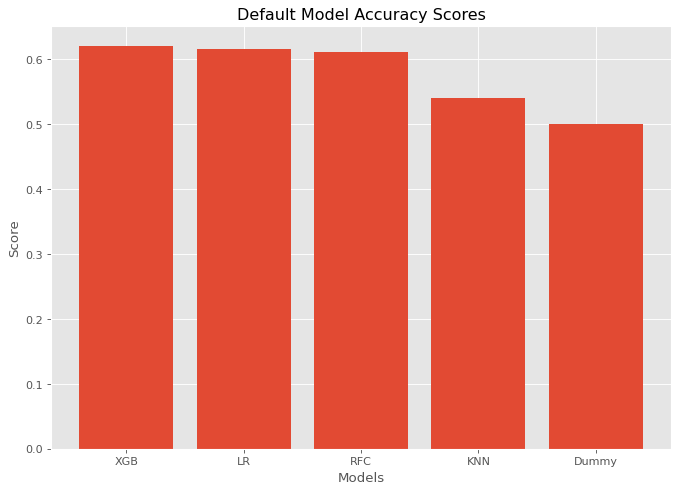

In [7]:
_ = figure(figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
_ = plt.bar(def_accuracy_df.index, def_accuracy_df['Default Accuracy Scores'])
_ = plt.title('Default Model Accuracy Scores')
_ = plt.ylabel('Score')
_ = plt.xlabel('Models')
plt.show()

In [8]:
logreg = LogisticRegression(random_state=123)

logreg.fit(X_train, y_train)

pred_lr = logreg.predict(X_test)

In [9]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)

In [10]:
xgbcl = xgb.XGBClassifier(objective='binary:logistic', random_state=123)

xgbcl.fit(X_train, y_train)

pred_xgb = xgbcl.predict(X_test)

In [11]:
rfc = RandomForestClassifier(random_state=123)

rfc.fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)

In [12]:
def_predictions = [pred_lr, pred_knn, pred_xgb, pred_rfc]

In [13]:
GS_acc_scores = []
GS_predictions = []
GS_pred_probs = []
GS_times = []

# Logistic Regression

In [14]:
print('LR accuracy score = {}'.format(round(accuracy_score(y_test, pred_lr), 4)))
print('LR precision score = {}'.format(round(precision_score(y_test, pred_lr), 4)))
print('LR recall score = {}'.format(round(recall_score(y_test, pred_lr), 4)))
print('LR F1 score = {}'.format(round(f1_score(y_test, pred_lr), 4)))

LR accuracy score = 0.6152
LR precision score = 0.6148
LR recall score = 0.4162
LR F1 score = 0.4963


In [15]:
confusion_matrix(pred_lr, y_test)

array([[2128, 1330],
       [ 594,  948]])

In [16]:
prob_lr = logreg.predict_proba(X_test)

# Grid Search Logistic Regression

In [17]:
c_space = [0.01,0.1,1,10,100]
max_iter = [1,10,100,200]

params = {'C': c_space, 
          'max_iter':max_iter
         }

lr_gs = GridSearchCV(logreg, param_grid=params, cv=5, scoring=make_scorer(roc_auc_score))

lr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=123, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [1, 10, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(roc_auc_score), verbose=0)

In [18]:
lr_gs.best_params_

{'C': 100, 'max_iter': 200}

In [19]:
start = time()

lr_gs = LogisticRegression(C=100, max_iter=200)

lr_gs.fit(X_train, y_train)

stop = time()

fit_time_lr = stop - start

print(round(fit_time_lr, 3), 'seconds to run')

0.558 seconds to run


In [20]:
GS_times.append(fit_time_lr)

In [21]:
pred_GSLR = lr_gs.predict(X_test)
GS_predictions.append(pred_GSLR)

In [22]:
confusion_matrix(pred_GSLR, y_test)

array([[2140, 1345],
       [ 582,  933]])

In [23]:
print('Grid search LR accuracy score = {}'.format(round(accuracy_score(y_test, pred_GSLR), 4)))
print('Grid search LR precision score = {}'.format(round(precision_score(y_test, pred_GSLR), 4)))
print('Grid search LR recall score= {}'.format(round(recall_score(y_test, pred_GSLR), 4)))
print('Grid search LR F1 score = {}'.format(round(f1_score(y_test, pred_GSLR), 4)))

Grid search LR accuracy score = 0.6146
Grid search LR precision score = 0.6158
Grid search LR recall score= 0.4096
Grid search LR F1 score = 0.492


In [24]:
GS_acc_scores.append((round(accuracy_score(y_test, pred_GSLR), 4)))

In [25]:
print(classification_report(y_test, pred_GSLR))

              precision    recall  f1-score   support

         0.0       0.61      0.79      0.69      2722
         1.0       0.62      0.41      0.49      2278

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.59      5000
weighted avg       0.61      0.61      0.60      5000



In [26]:
prob_GSLR = lr_gs.predict_proba(X_test)
GS_pred_probs.append(prob_GSLR)

# K Nearest Neighbors

In [27]:
print('KNN accuracy score = {}'.format(round(accuracy_score(y_test, pred_knn), 4)))
print('KNN precision score = {}'.format(round(precision_score(y_test, pred_knn), 4)))
print('KNN recall score = {}'.format(round(recall_score(y_test, pred_knn), 4)))
print('KNN F1 score = {}'.format(round(f1_score(y_test, pred_knn), 4)))

KNN accuracy score = 0.54
KNN precision score = 0.4952
KNN recall score = 0.4943
KNN F1 score = 0.4947


In [28]:
confusion_matrix(pred_knn, y_test)

array([[1574, 1152],
       [1148, 1126]])

In [29]:
prob_knn = knn.predict_proba(X_test)

# Grid Search K Nearest Neighbors

In [30]:
n_neighbors = range(1,76, 15)
leaf_size = [20, 30, 40]

params = {'n_neighbors': n_neighbors, 
          'leaf_size':leaf_size
         }

knn_gs = GridSearchCV(knn, param_grid=params, cv=5, scoring=make_scorer(roc_auc_score))

knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [20, 30, 40],
                         'n_neighbors': range(1, 76, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(roc_auc_score), verbose=0)

In [31]:
pred_GSKNN = knn_gs.predict(X_test)
GS_predictions.append(pred_GSKNN)

In [32]:
knn_gs.best_params_

{'leaf_size': 20, 'n_neighbors': 61}

In [36]:
start = time()

knn_gs = KNeighborsClassifier(leaf_size=20, n_neighbors=61)

knn_gs.fit(X_train, y_train)

stop = time()

fit_time_knn = stop - start

print(round(fit_time_knn, 3), 'seconds to run')

0.557 seconds to run


In [37]:
GS_times.append(fit_time_knn)

In [38]:
print('Grid Search KNN accuracy score = {}'.format(round(accuracy_score(y_test, pred_GSKNN), 4)))
print('Grid search KNN precision score = {}'.format(round(precision_score(y_test, pred_GSKNN), 4)))
print('Grid search KNN recall score = {}'.format(round(recall_score(y_test, pred_GSKNN), 4)))
print('Grid search KNN F1 score = {}'.format(round(f1_score(y_test, pred_GSKNN), 4)))

Grid Search KNN accuracy score = 0.574
Grid search KNN precision score = 0.5411
Grid search KNN recall score = 0.428
Grid search KNN F1 score = 0.4779


In [39]:
GS_acc_scores.append((round(accuracy_score(y_test, pred_GSKNN), 4)))

In [40]:
confusion_matrix(pred_GSKNN, y_test)

array([[1895, 1303],
       [ 827,  975]])

In [41]:
print(classification_report(y_test, pred_GSKNN))

              precision    recall  f1-score   support

         0.0       0.59      0.70      0.64      2722
         1.0       0.54      0.43      0.48      2278

    accuracy                           0.57      5000
   macro avg       0.57      0.56      0.56      5000
weighted avg       0.57      0.57      0.57      5000



In [42]:
prob_GSKNN = knn_gs.predict_proba(X_test)
GS_pred_probs.append(prob_GSKNN)

# Random Forest Classifier

In [43]:
print('RFC accuracy score = {}'.format(round(accuracy_score(y_test, pred_rfc), 4)))
print('RFC precision score = {}'.format(round(precision_score(y_test, pred_rfc), 4)))
print('RFC recall score = {}'.format(round(recall_score(y_test, pred_rfc), 4)))
print('RFC F1 score = {}'.format(round(f1_score(y_test, pred_rfc), 4)))

RFC accuracy score = 0.6118
RFC precision score = 0.5925
RFC recall score = 0.4737
RFC F1 score = 0.5265


In [44]:
confusion_matrix(pred_rfc, y_test)

array([[1980, 1199],
       [ 742, 1079]])

In [45]:
prob_rfc = rfc.predict_proba(X_test)

# Grid Search Random Forest Classifier

In [46]:
params = {'n_estimators':[10, 100, 1000],
        'criterion': ['gini', 'entropy'], 
        'max_depth':[None, 10, 20] 
         }

GridSearchCV(rfc, param_grid=params)

rfc_gs = GridSearchCV(rfc, param_grid=params, cv=5, scoring=make_scorer(roc_auc_score))

rfc_gs.fit(X_test, y_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=123,
                                 

In [47]:
pred_GSRFC = rfc_gs.predict(X_test)
GS_predictions.append(pred_GSRFC)

In [48]:
rfc_gs.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 1000}

In [49]:
start = time()

rfc_gs = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=1000)

rfc_gs.fit(X_test, y_test)

stop = time()

fit_time_rfc = stop - start

print(round(fit_time_rfc, 3), 'seconds to run')

4.107 seconds to run


In [50]:
GS_times.append(fit_time_rfc)

In [51]:
print('Grid search RFC accuracy score = {}'.format(round(accuracy_score(y_test, pred_GSRFC), 4)))
print('Grid search RFC precision score = {}'.format(round(precision_score(y_test, pred_GSRFC), 4)))
print('Grid search RFC recall score = {}'.format(round(recall_score(y_test, pred_GSRFC), 4)))
print('Grid search RFC F1 score = {}'.format(round(f1_score(y_test, pred_GSRFC), 4)))

Grid search RFC accuracy score = 0.7734
Grid search RFC precision score = 0.8323
Grid search RFC recall score = 0.6295
Grid search RFC F1 score = 0.7168


In [52]:
GS_acc_scores.append((round(accuracy_score(y_test, pred_GSRFC), 4)))

In [53]:
confusion_matrix(pred_GSRFC, y_test)

array([[2433,  844],
       [ 289, 1434]])

In [54]:
print(classification_report(y_test, pred_GSRFC))

              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81      2722
         1.0       0.83      0.63      0.72      2278

    accuracy                           0.77      5000
   macro avg       0.79      0.76      0.76      5000
weighted avg       0.78      0.77      0.77      5000



In [55]:
prob_GSRFC = rfc_gs.predict_proba(X_test)
GS_pred_probs.append(prob_GSRFC)

# XGBoost

In [56]:
print('XGB accuracy score = {}'.format(accuracy_score(y_test, pred_xgb)))
print('XGB precision score = {}'.format(precision_score(y_test, pred_xgb)))
print('XGB recall score = {}'.format(recall_score(y_test, pred_xgb)))
print('XGB F1 score = {}'.format(f1_score(y_test, pred_xgb)))

XGB accuracy score = 0.6202
XGB precision score = 0.5968318855390904
XGB recall score = 0.5127304653204565
XGB F1 score = 0.5515938606847698


In [57]:
confusion_matrix(pred_xgb, y_test)

array([[1933, 1110],
       [ 789, 1168]])

In [58]:
prob_xgbcl = xgbcl.predict_proba(X_test)

# Gradiant Boost XGBoost

In [61]:
n_estimators = [1, 5, 10, 20, 30, 50]
max_depth = [1, 3, 10, None]

params = {'n_estimators': n_estimators,
          'max_depth':max_depth
         }

xgb_gs = GridSearchCV(xgbcl, param_grid=params, cv=5, scoring=make_scorer(roc_auc_score))

xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_job...
                                     objective='binary:logistic',
                                     random_state=123, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     subsample=1, tree_method='exact',
      

In [62]:
pred_GSXGB = xgb_gs.predict(X_test)
GS_predictions.append(pred_GSXGB)

In [63]:
xgb_gs.best_params_

{'max_depth': None, 'n_estimators': 20}

In [64]:
start = time()

xgb_gs = xgb.XGBClassifier(objective='binary:logistic', max_depth=None, n_estimators=20)

xgb_gs.fit(X_train, y_train)

stop = time()

fit_time_xgb = stop - start

print(round(fit_time_xgb, 3), 'seconds to run')

0.455 seconds to run


In [65]:
GS_times.append(fit_time_xgb)

In [66]:
print('Grid search XGB accuracy score = {}'.format(round(accuracy_score(y_test, pred_GSXGB), 4)))
print('Grid search XGB precision score = {}'.format(round(precision_score(y_test, pred_GSXGB), 4)))
print('Grid search XGB recall score = {}'.format(round(recall_score(y_test, pred_GSXGB), 4)))
print('Grid search XGB F1 score = {}'.format(round(f1_score(y_test, pred_GSXGB), 4)))

Grid search XGB accuracy score = 0.6268
Grid search XGB precision score = 0.617
Grid search XGB recall score = 0.4767
Grid search XGB F1 score = 0.5379


In [67]:
GS_acc_scores.append((round(accuracy_score(y_test, pred_GSXGB), 4)))

In [68]:
confusion_matrix(pred_GSXGB, y_test)

array([[2048, 1192],
       [ 674, 1086]])

In [69]:
print(classification_report(y_test, pred_GSXGB))

              precision    recall  f1-score   support

         0.0       0.63      0.75      0.69      2722
         1.0       0.62      0.48      0.54      2278

    accuracy                           0.63      5000
   macro avg       0.62      0.61      0.61      5000
weighted avg       0.63      0.63      0.62      5000



In [70]:
prob_GSXGB = xgb_gs.predict_proba(X_test)
GS_pred_probs.append(prob_GSXGB)

# Visualizing Models

In [71]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, prob_lr[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, prob_knn[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, prob_rfc[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_test, prob_xgbcl[:,1])
fpr5, tpr5, thresholds5 = roc_curve(y_test, prob_GSLR[:,1])
fpr6, tpr6, thresholds6 = roc_curve(y_test, prob_GSKNN[:,1])
fpr7, tpr7, thresholds7 = roc_curve(y_test, prob_GSRFC[:,1])
fpr8, tpr8, thresholds8 = roc_curve(y_test, prob_GSXGB[:,1])

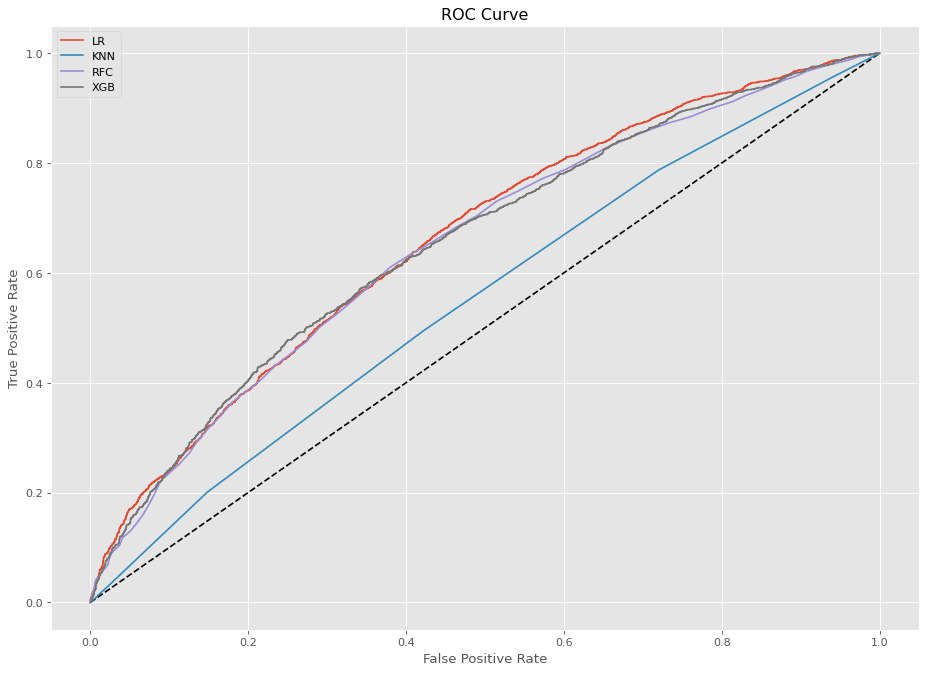

In [129]:
_ = figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr1, tpr1, label='LR')
_ = plt.plot(fpr2, tpr2, label='KNN')
_ = plt.plot(fpr3, tpr3, label='RFC')
_ = plt.plot(fpr4, tpr4, label='XGB')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.legend()

plt.savefig('../figures/ModelROCCurve.png')

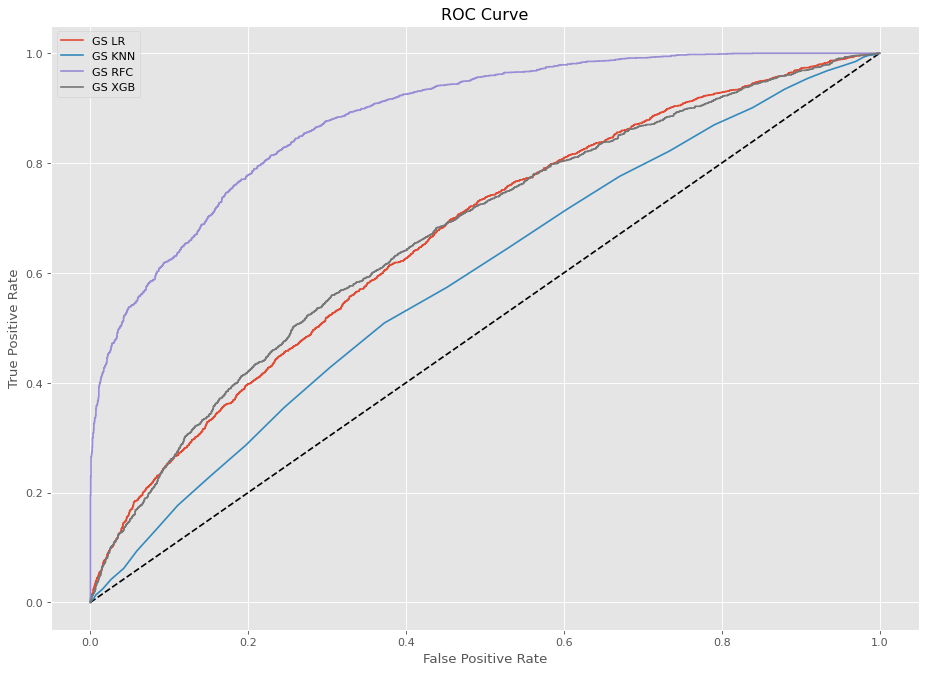

In [130]:
_ = figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr5, tpr5, label='GS LR')
_ = plt.plot(fpr6, tpr6, label='GS KNN')
_ = plt.plot(fpr7, tpr7, label='GS RFC')
_ = plt.plot(fpr8, tpr8, label='GS XGB')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.legend()

plt.savefig('../figures/ModelROCCurveFinal.png')

In [74]:
auc_preds = [prob_GSLR, prob_GSKNN, prob_GSRFC, prob_GSXGB]

In [75]:
auc_scores = []

for item in auc_preds:
    auc_scores.append(roc_auc_score(y_test, item[:,1]))

In [86]:
AUC_df = pd.DataFrame({'Labels':model_names[:-1], 'Fit_times':GS_times, 'GS_accuracy_scores':GS_acc_scores,
                       'AUC_scores':auc_scores}).set_index('Labels').sort_values(by='AUC_scores', ascending=False)
AUC_df

,Fit_times,GS_accuracy_scores,AUC_scores
Labels,,,
RFC,4.106606,0.7734,0.883675
XGB,0.454879,0.6268,0.668189
LR,0.558409,0.6146,0.665155
KNN,0.557119,0.5740,0.586294


In [141]:
final_df = pd.merge(def_accuracy_df, AUC_df, on='Labels').sort_values(by='AUC_scores', ascending=False)
final_df

,Default_accuracy_scores,Fit_times,GS_accuracy_scores,AUC_scores
Labels,,,,
RFC,0.6118,4.106606,0.7734,0.883675
XGB,0.6202,0.454879,0.6268,0.668189
LR,0.6152,0.558409,0.6146,0.665155
KNN,0.5400,0.557119,0.5740,0.586294


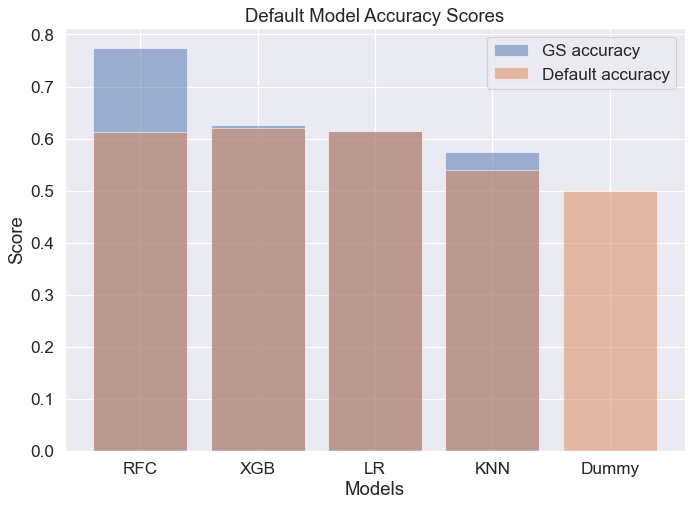

In [170]:
figure(figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot()
_ = plt.bar(final_df.index, final_df['GS_accuracy_scores'], alpha=0.5)
_ = plt.bar(def_accuracy_df.index, def_accuracy_df['Default_accuracy_scores'], alpha=0.5)
_ = plt.title('Default Model Accuracy Scores')
_ = plt.ylabel('Score')
_ = plt.xlabel('Models')
_ = plt.legend(['GS accuracy', 'Default accuracy'])

plt.savefig('../figures/finalaccuracyscores.png')

# Model Selection

In [124]:
zipped = zip(rfc_gs.feature_importances_, X_test.columns)

In [125]:
df_importance = pd.DataFrame(zipped).sort_values(by=0, ascending=False)
df_importance.reset_index(inplace=True, drop=True)

In [127]:
df_importance.columns = ['Importance', 'Feature']

In [128]:
df_importance.head(15)

,Importance,Feature
0,0.149487,number_inpatient
1,0.090562,num_medications
2,0.083157,num_lab_procedures
3,0.057175,number_diagnoses
4,0.054365,days_in_hospital
5,0.045655,number_emergency
6,0.042379,number_outpatient
7,0.036866,num_procedures
8,0.015015,Dx1_Heart_Failure
9,0.013838,paycode_payer_code_MC


In [152]:
final_model_cm = confusion_matrix(pred_GSXGB, y_test)
final_model_cm

array([[2048, 1192],
       [ 674, 1086]])

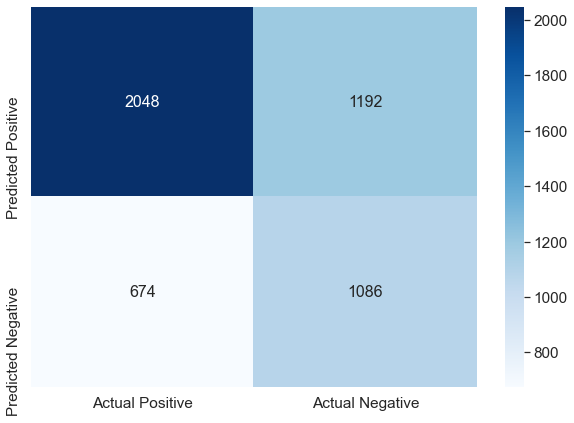

In [160]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(final_model_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='.4g',
            xticklabels=['Actual Positive', 'Actual Negative'], 
            yticklabels=['Predicted Positive', 'Predicted Negative'])

plt.savefig('../figures/modelcm.png')